<a href="https://colab.research.google.com/github/ShannonH98/PyTorchUdemyCourse/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Workflow

In [143]:
what_we_are_covering = {
1: "Data (prepare and upload)",
2: "Building the model",
3: "Fitting the model to data (training)",
4: "Making predictions and evaluating a model (inference)",
5: "Saving and loading a model",
6: "Putting it all together"
}

what_we_are_covering

{1: 'Data (prepare and upload)',
 2: 'Building the model',
 3: 'Fitting the model to data (training)',
 4: 'Making predictions and evaluating a model (inference)',
 5: 'Saving and loading a model',
 6: 'Putting it all together'}

In [144]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

torch.__version__


'2.8.0+cu126'

Preparing Data

it could be:
*   Youtube vidoes
*   Images
*   Audio files
*   DNA
*   Excel sheets
*   Text blocks

Machine learning is a game of two parts:

1. Get data into numerical represenation
2. Build a model to learn patterns in that numerical representation

To showcase this we will use a linear regression formula with known parameters


In [145]:
#Create known parameters
weight = 0.7
bias = 0.3

#Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [146]:
len(X), len(y)


(50, 50)

In [147]:
#Spliting data into training at test sets
#This is very important

#Create a train/set split

train_split = int(0.8 * len(X)) #Calculates how much of the dataset X to use for training. In this case 80%
X_train, y_train = X[:train_split], y[:train_split] #means take the first 80% of total samples
X_test, y_test = X[train_split:], y[train_split:] #Takes the remaining 20% of data for testing

train_split
X_train, y_train
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [148]:
#Visualizing the data

def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  Plots training data, test data and compares predictions
  """
  plt.figure(figsize=(10,7))

 #Plot training data in magenta
  plt.scatter(train_data, train_labels, c="m", s=4, label="Training data")

 #Plot testing in cyan
  plt.scatter(test_data, test_labels, c="c", s=4, label="Testing data")

  if predictions is not None:
    # Plot the predictions in red (predictions were made on the test data)
    plt.scatter(test_data, predictions, c="k", s=4, label="Predictions")

  #Show legend
  plt.legend(prop={"size": 14});



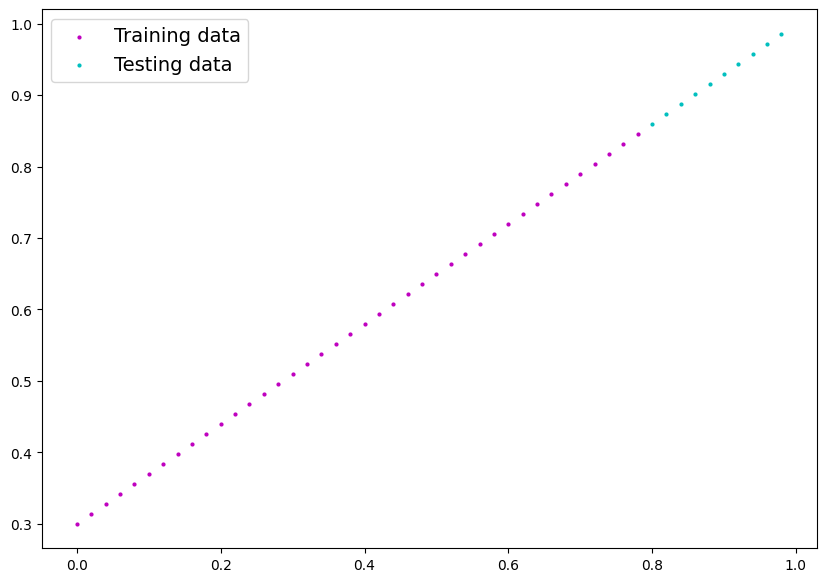

In [149]:

plot_predictions();

In [150]:
#Building a model
import torch
from torch import nn
#Create a linear regression model class

class LinearRegressionModel(nn.Module): #<- almost everything in Pytorch inherits from nn.Module
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                          requires_grad=True,
                                          dtype=torch.float
                                          ))
    self.bias = nn.Parameter(torch.randn(1,
                                       requires_grad=True,
                                       dtype=torch.float
                                       ))
  #Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)

In [151]:
import torch
###Cheking the content of our Pytorch Model

###Random seed (so we get the same value)


torch.manual_seed(42)

model_0 = LinearRegressionModel()#Instance of the model. Subclass of nn.Module

#Check out the parameters
list(model_0.parameters())



[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [152]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [153]:

X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [154]:
#Make predictions with model

with torch.inference_mode(): #Turns of gradients tracking, moves faster and keeps track of less data. When training we dont need to keey track of gradient
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

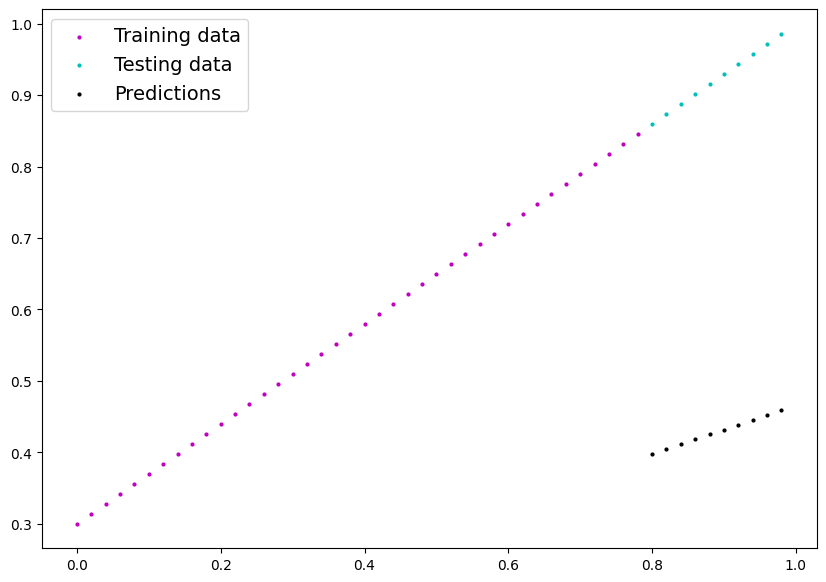

In [155]:
plot_predictions(predictions=y_preds)

Train the Model



In [156]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [157]:
#Setup a loss function
#A loss function (also called cost function or objective function) is a
#mathematical function that measures how well or badly a model’s predictions match the actual target values.
loss_fn = nn.L1Loss() #PyTorch built in function

#Setup an optimizer (stochastic gradient descent) #it adjust the parameters to reduce the loss
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr=0.01) #learning rate (smaller the lr the smaller the change in the parameter, and same for opposite)

In [158]:
loss_fn

L1Loss()

In [159]:
optimizer

SGD (
Parameter Group 0
    dampening: 0
    differentiable: False
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [160]:
#Build a training loop (and testing loop) in PyTorch

0. Step 0 - Loop through the data
1. Step 1 - Forward pass - moving data through the model to make prefictions (foward propogation)
2. Step 2 - Calculate the loss (compare forward pass with base values)
3. Step 3 - Optimizer zero grad
4. Step 4 - Loss backward
5. Step 5 - Optimizer step

In [161]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 150

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside
    y_pred = model_0(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step() #to make i start fresh after each loop

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.31288138031959534 | MAE Test Loss: 0.48106518387794495 
Epoch: 10 | MAE Train Loss: 0.1976713240146637 | MAE Test Loss: 0.3463551998138428 
Epoch: 20 | MAE Train Loss: 0.08908725529909134 | MAE Test Loss: 0.21729660034179688 
Epoch: 30 | MAE Train Loss: 0.053148526698350906 | MAE Test Loss: 0.14464017748832703 
Epoch: 40 | MAE Train Loss: 0.04543796554207802 | MAE Test Loss: 0.11360953003168106 
Epoch: 50 | MAE Train Loss: 0.04167863354086876 | MAE Test Loss: 0.09919948130846024 
Epoch: 60 | MAE Train Loss: 0.03818932920694351 | MAE Test Loss: 0.08886633068323135 
Epoch: 70 | MAE Train Loss: 0.03476089984178543 | MAE Test Loss: 0.0805937647819519 
Epoch: 80 | MAE Train Loss: 0.03132382780313492 | MAE Test Loss: 0.07232122868299484 
Epoch: 90 | MAE Train Loss: 0.02788739837706089 | MAE Test Loss: 0.06473556160926819 
Epoch: 100 | MAE Train Loss: 0.024458957836031914 | MAE Test Loss: 0.05646304413676262 
Epoch: 110 | MAE Train Loss: 0.021020207554101944 | MAE

In [162]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6638])), ('bias', tensor([0.3153]))])

In [163]:
weight, bias

(0.7, 0.3)

https://www.udemy.com/course/pytorch-for-deep-learning/learn/lecture/32719890#content

a lot of theory here


https://www.udemy.com/course/pytorch-for-deep-learning/learn/lecture/32719894#questions/18789092

also important data

In [164]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)


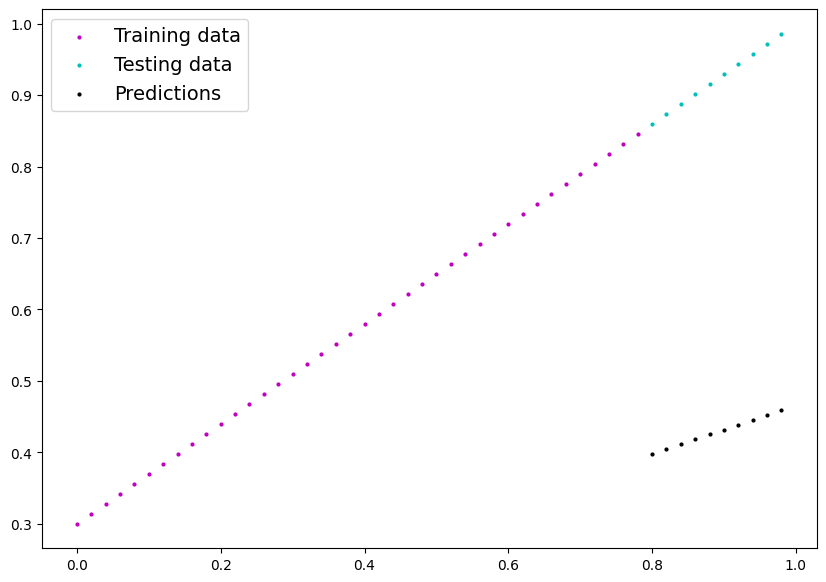

In [165]:
plot_predictions(predictions=y_preds)

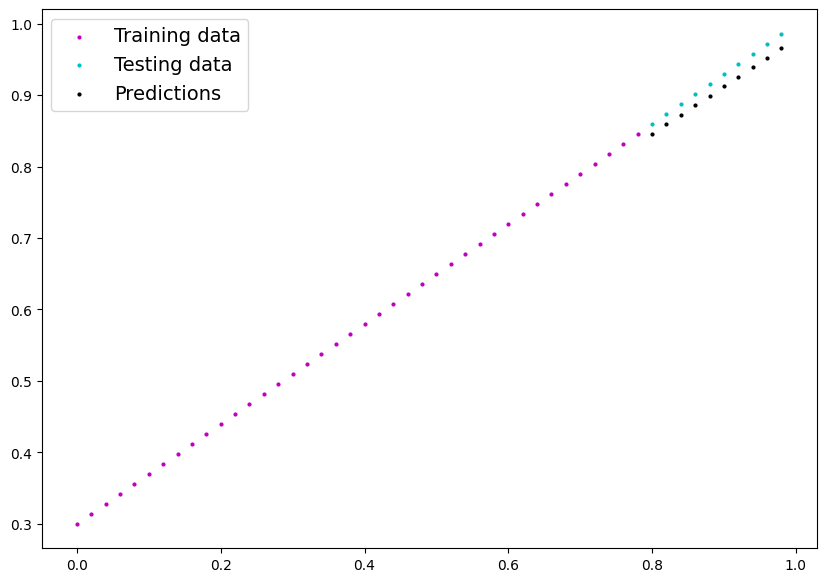

In [166]:
plot_predictions(predictions=y_preds_new)

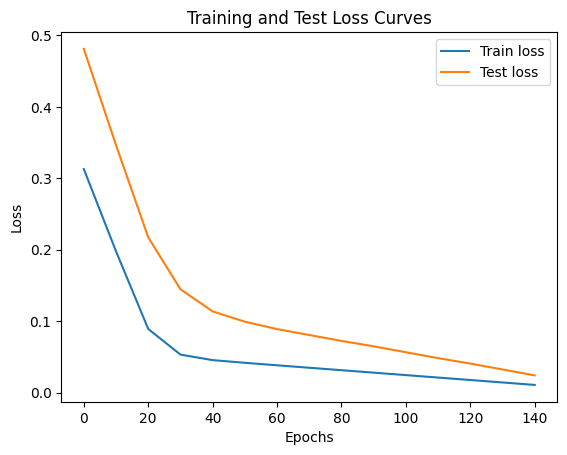

In [167]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and Test Loss Curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

https://www.udemy.com/course/pytorch-for-deep-learning/learn/lecture/32723800#questions/21173912

here too

Saving models

3 main ways to save and load

1. torch.save() - allows you to save Pytorch object in Python's pickle format

2. torch.load() - allows you to load a saved PyTorch object

3. torch.nn.Module.load_state_dict() - this allows you to load a model's saved state ditionary

In [168]:
#Saving our PyTorch Model
#Save/Load state_dict (Recommended)
from pathlib import Path

#1. Create model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

#2. Create Model save path
MODEL_NAME = "01_pytorch_workflow_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

#3. Save the model state dict - saving state dict is recommeneded
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)


Saving model to: models/01_pytorch_workflow_model.pth


In [169]:
!ls -l models

total 12
-rw-r--r-- 1 root root 1965 Aug 30 01:21 01_pytorch_model
-rw-r--r-- 1 root root 2181 Aug 30 01:15 01_pytorch_workflow_model_1.pth
-rw-r--r-- 1 root root 2101 Aug 30 01:21 01_pytorch_workflow_model.pth


In [170]:
#Make some model preds

model_0.eval()
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.8464],
        [0.8596],
        [0.8729],
        [0.8862],
        [0.8995],
        [0.9127],
        [0.9260],
        [0.9393],
        [0.9526],
        [0.9659]])

In [171]:
# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model_0 = LinearRegressionModel()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# 1. Put the loaded model into evaluation mode
loaded_model_0.eval()

# 2. Use the inference mode context manager to make predictions
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test) # perform a forward pass on the test data with the loaded model

    # Compare previous model predictions with loaded model predictions (these should be the same)
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# Putting it all togather

In [172]:
#Impor PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

#Check current version of PyTorch
torch.__version__
#current version: '2.8.0+cu126'

'2.8.0+cu126'

In [173]:
#This will check if running cuda or cpu.
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")
#Check the device being used. I dont have cuda set up so it would be cpu

Using device: cpu


In [174]:
# Create weight and bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) # we need to unsqueeze to prevent shape erros later
y = weight * X + bias
X[:10], y[:10] #shows the 0-9 in array

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [175]:
#At this point we split the data between testsing and training data. 80/20 is the typical split
#1. Split the data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split] #from 0 to train_split, 80% of the list
X_test, y_test = X[train_split:], y[train_split:] #the rest of the value not used in the training split
len(X_train), len(y_train), len(X_test), len(y_test) #Shows how much data is in each

(40, 40, 10, 10)

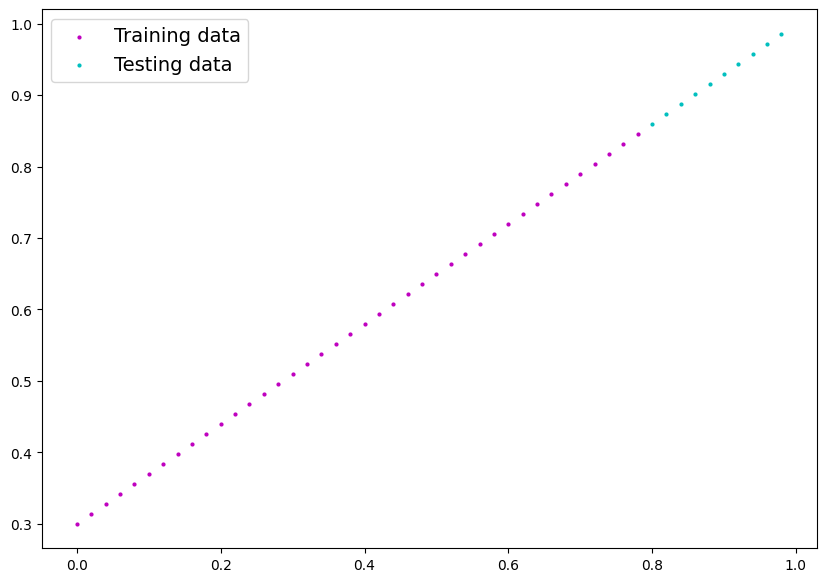

In [176]:
plot_predictions(X_train, y_train, X_test, y_test)

In [177]:
# Subclass nn.Module to make our model
class LinearRegressionModelV2(nn.Module): #2nd one
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters
        self.linear_layer = nn.Linear(in_features=1,
                                      out_features=1)

    # Define the forward computation (input data x flows through nn.Linear())
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

# Set the manual seed when creating the model (this isn't always needed but is used for demonstrative purposes, try commenting it out and seeing what happens)
torch.manual_seed(27) #i just put my age
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.9694]])),
              ('linear_layer.bias', tensor([-0.8296]))]))

In [178]:
# Set model to GPU if it's available, otherwise it'll default to CPU
model_1.to(device) # the device variable was set above to be "cuda" if available or "cpu" if not
next(model_1.parameters()).device
#Would still be the cpu

device(type='cpu')

In [179]:
#Time for training

# Create loss function
loss_fn = nn.L1Loss()#default function

# Create optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), # optimize the newly created model's parameters for the SGD function
                            lr=0.01)

In [180]:
torch.manual_seed(27) #Same as above

# Set the number of epochs
epochs = 1000

# Put data on the available device
# Without this, error will happen (not all model/data on device)
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    ### Training
    model_1.train() # train mode is on by default after construction

    # 1. Forward pass
    y_pred = model_1(X_train)

    # 2. Calculate loss
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad optimizer
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Step the optimizer
    optimizer.step()

    ### Testing
    model_1.eval() # put the model in evaluation mode for testing (inference) to move faster
    # 1. Forward pass
    with torch.inference_mode():
        test_pred = model_1(X_test)

        # 2. Calculate the loss
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")

Epoch: 0 | Train loss: 1.0245774984359741 | Test loss: 0.8764252662658691
Epoch: 100 | Train loss: 0.11911282688379288 | Test loss: 0.22775426506996155
Epoch: 200 | Train loss: 0.08144184947013855 | Test loss: 0.18939371407032013
Epoch: 300 | Train loss: 0.04710521548986435 | Test loss: 0.10941821336746216
Epoch: 400 | Train loss: 0.012755629606544971 | Test loss: 0.028753887861967087
Epoch: 500 | Train loss: 0.002829640405252576 | Test loss: 0.012949949130415916
Epoch: 600 | Train loss: 0.002829640405252576 | Test loss: 0.012949949130415916
Epoch: 700 | Train loss: 0.002829640405252576 | Test loss: 0.012949949130415916
Epoch: 800 | Train loss: 0.002829640405252576 | Test loss: 0.012949949130415916
Epoch: 900 | Train loss: 0.002829640405252576 | Test loss: 0.012949949130415916


In [181]:
# Find our model's learned parameters
from pprint import pprint # pprint = pretty print, first time seeing pretty print
print("The model learned the following values for weights and bias:")
print(model_1.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")

The model learned the following values for weights and bias:
OrderedDict({'linear_layer.weight': tensor([[0.7046]]), 'linear_layer.bias': tensor([0.2954])})

And the original values for weights and bias are:
weights: 0.7, bias: 0.3


In [182]:
# Shift to evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds

tensor([[0.8591],
        [0.8732],
        [0.8872],
        [0.9013],
        [0.9154],
        [0.9295],
        [0.9436],
        [0.9577],
        [0.9718],
        [0.9859]])

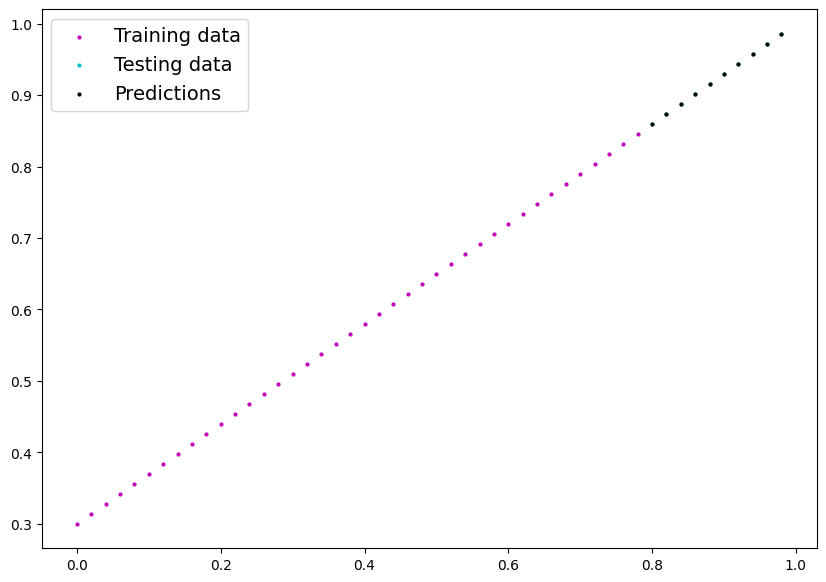

In [183]:
# Put data on the CPU and plot it
plot_predictions(predictions=y_preds)
#if on cuda use 'plot_predictions(predictions=y_preds.cpu())'

In [184]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_1.pth


In [185]:
# Instantiate a fresh instance of LinearRegressionModelV2
loaded_model_1 = LinearRegressionModelV2()

# Load model state dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put model to target device (if your data is on GPU, model will have to be on GPU to make predictions)
loaded_model_1.to(device)

print(f"Loaded model:\n{loaded_model_1}")
print(f"Model on device:\n{next(loaded_model_1.parameters()).device}")

Loaded model:
LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)
Model on device:
cpu


In [186]:
# Evaluate loaded model / See if it is saved properly
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# More Practice

In [187]:
#Import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt

#Check current version of PyTorch
torch.__version__
#current version: '2.8.0+cu126'

'2.8.0+cu126'

In [188]:
# Create weight and bias
weight = 0.3
bias = 0.9

# Create X and y (features and labels)
X = torch.arange(0, 1, 0.01).unsqueeze(dim=1) # we need to unsqueeze to prevent shape erros later
y = weight * X + bias
X[:10], y[:10] #shows the 0-9 in array


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900]]),
 tensor([[0.9000],
         [0.9030],
         [0.9060],
         [0.9090],
         [0.9120],
         [0.9150],
         [0.9180],
         [0.9210],
         [0.9240],
         [0.9270]]))

In [189]:
#At this point we split the data between testsing and training data. 80/20 is the typical split
#1. Split the data
train_split = int(0.8 * len(X))
X_train = X[:train_split]
y_train = y[:train_split] #from 0 to train_split, 80% of the list
X_test = X[train_split:]
y_test= y[train_split:] #the rest of the value not used in the training split
len(X_train), len(y_train), len(X_test), len(y_test) #Shows how much data is in each

(80, 80, 20, 20)

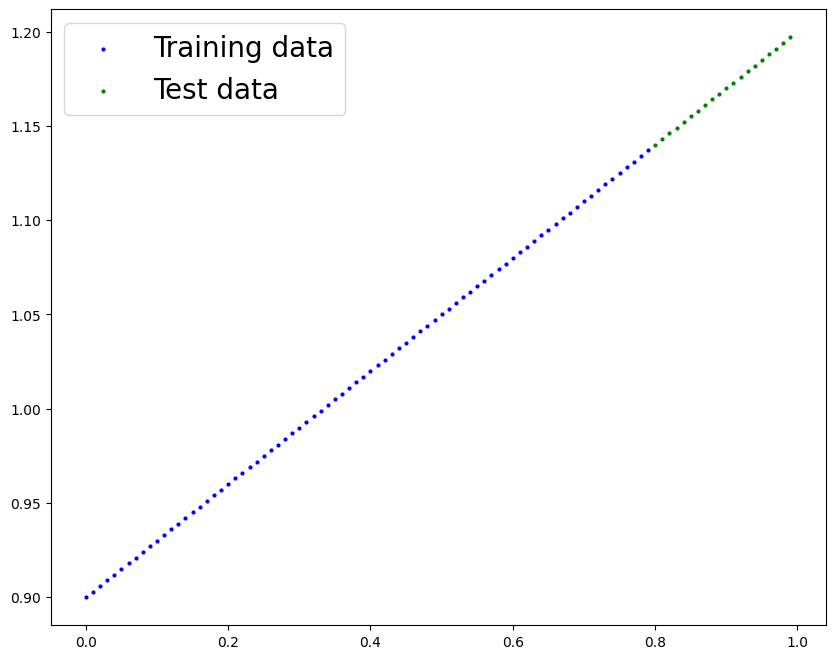

In [190]:
def plot_predictions(train_data = X_train,
                 train_labels = y_train,
                 test_data = X_test,
                 test_labels = y_test,
                 predictions = None):

  plt.figure(figsize = (10,8))
  plt.scatter(train_data,train_labels,c = 'b',s = 4,label = "Training data")
  plt.scatter(test_data,test_labels,c = 'g',s = 4,label = "Test data")

  if predictions is not None:
    plt.scatter(test_data,predictions,c = 'r',s = 4,label = "Predictions")
  plt.legend(prop = {"size" : 20})
plot_predictions()

In [191]:
import torch
from torch import nn

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                          requires_grad=True,
                                          dtype=torch.float
                                          ))
    self.bias = nn.Parameter(torch.randn(1,
                                       requires_grad=True,
                                       dtype=torch.float
                                       ))

  def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x + self.bias

In [192]:
import torch

torch.manual_seed(42)

model_2 = LinearRegressionModel()
model_2, model_2.state_dict()

(LinearRegressionModel(),
 OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))]))

In [193]:
model_2.to(device)
list(model_2.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [194]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_2.parameters(),
                            lr = 0.01)

In [203]:
torch.manual_seed(42)

epochs = 200


X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_2.train()
  y_pred = model_2(X_train)
  loss = loss_fn(y_pred,y_train)
  optimizer.zero_grad()
  loss.backward()

  optimizer.step()
  if epoch % 20 == 0:
    model_2.eval()
    with torch.inference_mode():
      y_preds = model_2(X_test)
      test_loss = loss_fn(y_preds,y_test)
      print(f"Epoch: {epoch} | Train loss: {loss:.3f} | Test loss: {test_loss:.3f}")

Epoch: 0 | Train loss: 0.011 | Test loss: 0.026
Epoch: 20 | Train loss: 0.004 | Test loss: 0.009
Epoch: 40 | Train loss: 0.004 | Test loss: 0.006
Epoch: 60 | Train loss: 0.004 | Test loss: 0.006
Epoch: 80 | Train loss: 0.004 | Test loss: 0.006
Epoch: 100 | Train loss: 0.004 | Test loss: 0.006
Epoch: 120 | Train loss: 0.004 | Test loss: 0.006
Epoch: 140 | Train loss: 0.004 | Test loss: 0.006
Epoch: 160 | Train loss: 0.004 | Test loss: 0.006
Epoch: 180 | Train loss: 0.004 | Test loss: 0.006


In [196]:
model_2.eval()

with torch.inference_mode():
  y_preds = model_2(X_test)
y_preds

tensor([[1.1612],
        [1.1648],
        [1.1683],
        [1.1719],
        [1.1755],
        [1.1790],
        [1.1826],
        [1.1862],
        [1.1897],
        [1.1933],
        [1.1968],
        [1.2004],
        [1.2040],
        [1.2075],
        [1.2111],
        [1.2146],
        [1.2182],
        [1.2218],
        [1.2253],
        [1.2289]])

In [197]:
y_preds.cpu()

tensor([[1.1612],
        [1.1648],
        [1.1683],
        [1.1719],
        [1.1755],
        [1.1790],
        [1.1826],
        [1.1862],
        [1.1897],
        [1.1933],
        [1.1968],
        [1.2004],
        [1.2040],
        [1.2075],
        [1.2111],
        [1.2146],
        [1.2182],
        [1.2218],
        [1.2253],
        [1.2289]])

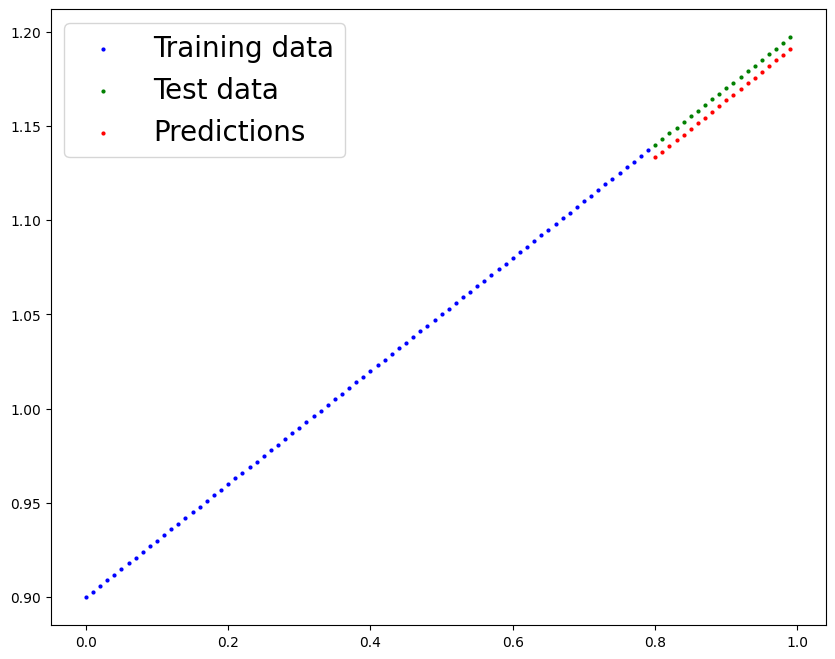

In [204]:
plot_predictions(predictions = y_preds.cpu())

In [199]:
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents = True,exist_ok = True)
# 2. Create model save path
MODEL_NAME = "01_pytorch_model"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
# 3. Save the model state dict
print(f"Saving model to {MODEL_SAVE_PATH}")
torch.save(obj = model_2.state_dict(),f = MODEL_SAVE_PATH)

Saving model to models/01_pytorch_model


In [200]:
loaded_model = LinearRegressionModel()
loaded_model.load_state_dict(torch.load(f = MODEL_SAVE_PATH))
loaded_model.to(device)

LinearRegressionModel()

In [201]:
y_preds_new = loaded_model(X_test)
y_preds == y_preds_new

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [202]:
loaded_model.state_dict()

OrderedDict([('weights', tensor([0.3561])), ('bias', tensor([0.8763]))])